# Project - Titanic: Machine Learning from Disaster

This is a [Kaggle competition](https://www.kaggle.com/c/titanic). In this competition, we have access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.


Train.csv contain the details of a subset of the passengers on board (891 passengers) and importantly, will reveal whether they survived or not. The `test.csv` dataset contains similar information but does not disclose the info of survival for each passenger. Based on the patterns found in the train.csv data, the goal is to predict whether the other 418 passengers on board (found in test.csv) survived.

#### Data Dictionary

| Variable | Definition | Key |
| :-: | :-: | :-: |
survival | Survival |	0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex	
Age | Age in years	
sibsp | # of siblings / spouses aboard the Titanic	
parch | # of parents / children aboard the Titanic	
ticket | Ticket number	
fare | Passenger fare	
cabin | Cabin number	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton




		


#### Metric
In this competition, the score is the percentage of passengers correctly predicted. This is known as accuracy.

#### Submission File Format
It should be submited a csv file with exactly 418 entries plus a header row. The file should have exactly 2 columns:
PassengerId (sorted in any order) and Survived (contains binary predictions: 1 for survived, 0 for deceased)


## Import libraries

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
%matplotlib inline

## Reading the data

In [208]:
df_test = pd.read_csv('./datasets/test.csv');
df_train = pd.read_csv('./datasets/train.csv');
# show the 5 first rows
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [172]:
# number of rows and columns
df_train.shape

(891, 12)

In [173]:
# data's statistic
df_train.drop(['PassengerId','Survived'], axis=1).describe()

Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

In [174]:
df_train[df_train['Fare']>500]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C

## Data Visualization and Statistics

Below, there are some histograms about the train dataset. We can note, among other things, that the most of the ship's public is young, most of them has not a relative in the Titanic and more than the half of the passengers did not survive.

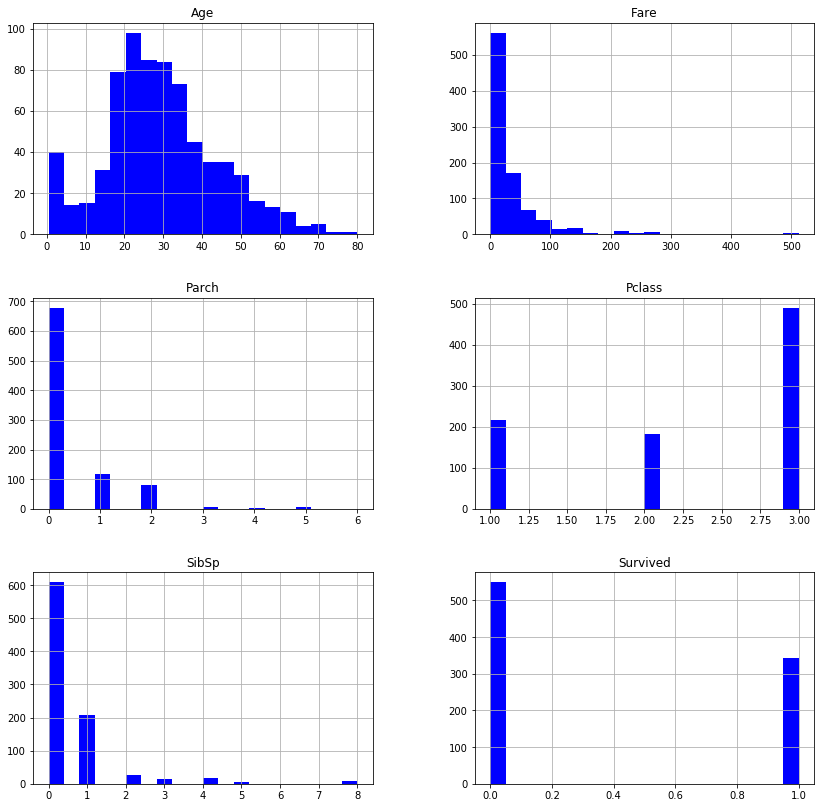

In [175]:
df_train.drop('PassengerId', axis=1).hist(figsize=(14,14), color='blue', bins=20)
plt.show()

From the train dataset, we can see that 342 people survived and 549 died.

In [176]:
print(df_train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


From this number, 109 were men and 233 were women. Percentually, only 19% of the men surived. 

Number of Passengers by Sex: 
Female:	 314
Male: 	 577

Number of Survivals by Sex: 
Female:	 233 74.00%
Male:	 109 19.00%


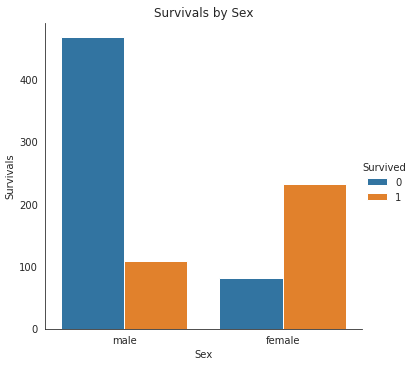

In [177]:
passengers_by_sex = df_train['Sex'].value_counts()
survivals_by_sex = df_train[df_train['Survived']==1].groupby('Sex')['Survived'].count()
percetage_female_survived = survivals_by_sex['female']/passengers_by_sex['female']
percetage_male_survived = survivals_by_sex['male']/passengers_by_sex['male']

print('Number of Passengers by Sex: ')
print('Female:\t %s' % str(passengers_by_sex['female']))
print('Male: \t %s' % str(passengers_by_sex['male']))
print('\nNumber of Survivals by Sex: ')
print('Female:\t %s %.2f%%' % (str(survivals_by_sex['female']), 100 * round(percetage_female_survived, 2)))
print('Male:\t %s %.2f%%' % (str(survivals_by_sex['male']), 100 * round(percetage_male_survived, 2)))
with sns.axes_style('white'):
    g = sns.catplot("Sex", data=df_train, kind='count',
                       hue='Survived')
    g.set_ylabels('Survivals')
plt.title('Survivals by Sex')
plt.show()


We can also note that the Class of the trip is also a really predictable variable. The most of passengers of Pclass 1 survived, while less than one third of the Pclass 3 survived. We also see that there are a concentration of passengers by age according to the Pclass, there was a concentration of young people mainly in the Pclass 3, for example, and a concentration of old people in Pclass 1.


Passengers by Pclass: 
1    216
2    184
3    491
Name: Pclass, dtype: int64


Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64


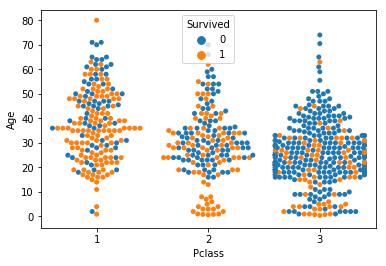

In [179]:
print('Passengers by Pclass: ')
print(df_train['Pclass'].value_counts(sort=False, ascending=False))
print('\n')
print(df_train.groupby(['Survived','Pclass']).size())

sns.swarmplot(x='Pclass',y='Age',data=df_train, hue='Survived')
plt.show()


There does not appear to be any unacceptable or absurd float value in the input data. From the graph below, it is possible that there are some outliers in terms of age and fare. However, they are acceptable values, they are not so high or so low. Therefore, it does not seem to be interesting to remove these records from the dataset.

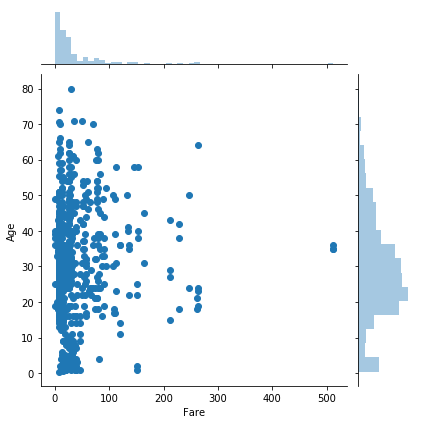

In [178]:
sns.jointplot(x='Fare',y='Age',data=df_train)
plt.show()

## Data Preprocessing


### Duplicated Rows

We can note that there are not duplicated rows in the train dataset.

In [180]:
# check number of duplicates
df_train.duplicated().sum()

0

### Missing Values

In this step we are checking and filling the missing values.

In [181]:
## searching for missing values
print("Missing values in the train dataframe:")
for column in df_train:
    if(df_train[column].isnull().values.any() == True):
        occurrences = df_train[column].isnull().sum()
        print('Column %s with %.2f%% of null values - %s occurencies ' % (str(column), (100 * occurrences/df_train.shape[0]),  str(occurrences) ))
print('\n')
print("Missing values in the test dataframe:")
for column in df_test:
    if(df_test[column].isnull().values.any() == True):
        occurrences = df_test[column].isnull().sum()
        print('Column %s with %.2f%% of null values - %s occurencies ' % (str(column), (100 * occurrences/df_test.shape[0]),  str(occurrences) ))


Missing values in the train dataframe:
Column Age with 19.87% of null values - 177 occurencies 
Column Cabin with 77.10% of null values - 687 occurencies 
Column Embarked with 0.22% of null values - 2 occurencies 


Missing values in the test dataframe:
Column Age with 20.57% of null values - 86 occurencies 
Column Fare with 0.24% of null values - 1 occurencies 
Column Cabin with 78.23% of null values - 327 occurencies 


In [182]:
# I will replace missing data by adding a category "Missing"
# then I will narrow down the different cabins by selecting only the
# first letter, which represents the deck in which the cabin was located
df_train['Cabin'].fillna('Missing', inplace=True)
df_train['Cabin'] = df_train['Cabin'].str[0] # captures first letter of string (the letter of the cabin)
df_train['Cabin'].unique()

df_test['Cabin'].fillna('Missing', inplace=True)
df_test['Cabin'] = df_test['Cabin'].str[0]
df_test['Cabin'].unique()
df_test['Cabin__T'] = 0 # added column present in train dataset but not present in test dataset


# I will input the mean value for the numeric columns and use the 
# most frequent value for the Embarked column.
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].value_counts().index[0])
df_train['Age'] = df_train['Age'].transform(lambda x: x.fillna(round(x.mean())))

df_test['Age'] = df_test['Age'].transform(lambda x: x.fillna(round(x.mean())))
df_test['Fare'] = df_test['Fare'].transform(lambda x: x.fillna(x.mean()))

We can now see that there are not missing values anymore in the datasets.

In [183]:
# Run this code cell to check how many null values are in the data set
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [184]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin__T       0
dtype: int64

### Categorical Data

Many machine learning models are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers. Here, we are so tranforming the text/categorical columns in numerical columns.

In [185]:
# for Sex / Gender
df_train['Sex'] = np.where(df_train['Sex'] == 'male', 1, 0)
df_test['Sex'] = np.where(df_test['Sex'] == 'male', 1, 0)

In [186]:
# get dummies columns for Embarked
dummies_embarked_train = pd.DataFrame(pd.get_dummies(df_train['Embarked'], prefix='Embarked_'))
df_train = pd.concat([df_train, dummies_embarked_train], axis=1)
dummies_embarked_test = pd.DataFrame(pd.get_dummies(df_test['Embarked'], prefix='Embarked_'))
df_test = pd.concat([df_test, dummies_embarked_test], axis=1)

# get dummies columns for Cabin
dummies_cabin_train = pd.DataFrame(pd.get_dummies(df_train['Cabin'], prefix='Cabin_'))
df_train = pd.concat([df_train, dummies_cabin_train], axis=1)
dummies_cabin_test = pd.DataFrame(pd.get_dummies(df_test['Cabin'], prefix='Cabin_'))
df_test = pd.concat([df_test, dummies_cabin_test], axis=1)

# drop Embarked, Cabin and others unecessary columns
df_train.drop(['Embarked', 'Cabin','Name', 'Ticket'], axis = 1, inplace = True)
df_test.drop(['Embarked', 'Cabin','Name', 'Ticket'], axis = 1, inplace = True)


In [187]:
df_train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked__C  Embarked__Q  Embarked__S  Cabin__A  Cabin__B  Cabin__C  \
0            0            0            1         0         0         0   
1            1            0            0         0         0         1   
2            0            0            1         0         0         0   
3            0            0            1         0         0         1   
4            0            0            1         0         0         0   

   Cabin__D  Cabin__E  Cabin__F  Cabin__G  Cabin__M  Cabin__T  
0         0         0         0         0         1         0  
1         0         0         0         0         0         0  
2         0         0         0         0         1         0  
3         0         0         0         0         0         0  
4         0         0         0         0         1         0

### Data Rescaling

The preprocessed data contains attributes with a mixtures of scales. Many machine learning methods expect or are more effective if the data attributes have the same scale. So, above we use a scaling method to solve this problem.

In [188]:
scaler = MinMaxScaler()
df_train[['Age', 'Fare','SibSp', 'Parch']] = scaler.fit_transform(df_train[['Age', 'Fare','SibSp','Parch']])
df_test[['Age', 'Fare','SibSp', 'Parch']]  = scaler.transform(df_test[['Age', 'Fare','SibSp','Parch']])

In [206]:
df_train.head()

Pclass  Sex       Age  SibSp  Parch      Fare  Embarked__C  Embarked__Q  \
0       3    1  0.271174  0.125    0.0  0.014151            0            0   
1       1    0  0.472229  0.125    0.0  0.139136            1            0   
2       3    0  0.321438  0.000    0.0  0.015469            0            0   
3       1    0  0.434531  0.125    0.0  0.103644            0            0   
4       3    1  0.434531  0.000    0.0  0.015713            0            0   

   Embarked__S  Cabin__A  Cabin__B  Cabin__C  Cabin__D  Cabin__E  Cabin__F  \
0            1         0         0         0         0         0         0   
1            0         0         0         1         0         0         0   
2            1         0         0         0         0         0         0   
3            1         0         0         1         0         0         0   
4            1         0         0         0         0         0         0   

   Cabin__G  Cabin__M  Cabin__T  
0         0         1         0  
1         0         0         0  
2         0         1         0  
3         0         0         0  
4         0         1         0

## Classification

Now we are already ready for create our model and test it. First, we need to prepare the variables that will be used as the train and the test data.



In [189]:
# defining X and Y columns
y_train = df_train['Survived'].values
df_train.drop(['PassengerId','Survived'], axis=1, inplace=True)
X_train = df_train

test_passengers_id = df_test['PassengerId']
df_test.drop(['PassengerId'], axis=1, inplace=True)
X_test = df_test

Then we will test some classifiers, using cross validation with 10 folds, and select the better one to be used in the final prediction.

In [190]:
# Defining classifiers
logreg = LogisticRegression(solver='lbfgs',random_state=0)
Gauss = GaussianNB()
rf = RandomForestClassifier(max_depth=50, n_estimators=150, random_state=0)
gboost = GradientBoostingClassifier( random_state=0)
DTC =  DecisionTreeClassifier(random_state=0)
RF = RandomForestClassifier(n_estimators=200)
svc = SVC(gamma='auto', random_state=0)
xgb = xgb.XGBClassifier(max_depth=3, n_estimators=10, learning_rate=0.01)
models = [logreg,Gauss, gboost,DTC,RF,svc,xgb]

In [191]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 10, scoring=scoring)
    return np.mean(xval)

In [24]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('--------------')


Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.7991385767790262
--------------
Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV score = 0.6374781523096129
--------------
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.826079900124844
--------------
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 0.780099875156055
--------------
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8013982521847689
--------------
Cross-validation of : <class 'sklearn.svm._classes.SVC'>
CV score = 0.786729088639201
--------------
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
CV score = 0.8159300873907617
--------------


In [25]:
X_train.shape

(891, 18)

### Prediction

Now we will make our submission file, with the predict of the test data using our best classifier.

In [202]:
# Train
gboost.fit(X_train, y_train.ravel()) 

# Prediction      
y_pred = gboost.predict(X_test)


In [203]:
df_y_pred = pd.DataFrame(y_pred, columns = ['Survived'])
df_result = pd.concat([test_passengers_id,df_y_pred],axis =1)
df_result.to_csv('submission.csv', encoding='utf-8', index=False)


In [204]:
df_result.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

## Reflection and Improvements

We observed the Titanic data and made some observations about the information of the passengers of this accident. It's interesting that the ship had more men passengers then women passengers, but the number of women that survived is more than the double of the number of men that survived. It is also interesting see how the class of the trip was also a determining factor to discover if a person died or not.

We created a machine learning model that predicts if a passenger survived or not to the Titanic. I submitted the submission file to Kaggles's competition and I obtained 0.7799 of accuracy. It was a good result for a first attempt.

For improvements it could be used other hyperparams in the classifiers, tested other classifiers, use some neural network, or make use of ensemble methods. What I did here was use another strategy, that is the use a Feature Selector method, the Exhaustive Features Selector, that basically will combine the variables searching for the better combination result for the classifier, increasing the number of features. At the end, it will return the best accuracy obtained and the best combination of features.


In [26]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as ESF

efs1 = ESF(gboost, scoring='accuracy',cv=10, n_jobs=-1,  max_features = 3)
efs1= efs1.fit((X_train), y_train.ravel())
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)


Features: 987/987

Best accuracy score: 0.82
Best subset (indices): (0, 1, 5)
Best subset (corresponding names): ('Pclass', 'Sex', 'Fare')


In [205]:
# Train
gboost.fit(X_train[['Pclass', 'Sex', 'Fare']], y_train.ravel()) 

# Prediction      
y_pred = gboost.predict(X_test[['Pclass', 'Sex', 'Fare']])


It takes a long time to run. I tried only to see the result of it with the maximum of 3 features. Then I made a new submission on Kaggle's competition and I obtained a score of 0.78229 and I moved up more than 1000 positions. It's really interesting how using the information of only 3 columns I obtained a better result then using 18, and probably if I had used more features using this Feature Selection algorithm, possibly I could obtain a better position in the competition.